<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#College-Educational-Programs-and-Community-College-opportunties-for-trades-and-beyond" data-toc-modified-id="College-Educational-Programs-and-Community-College-opportunties-for-trades-and-beyond-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>College Educational Programs and Community College opportunties for trades and beyond</a></span></li><li><span><a href="#Fresno-County-Stationary-Data" data-toc-modified-id="Fresno-County-Stationary-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fresno County Stationary Data</a></span></li><li><span><a href="#Gridsearch-Function" data-toc-modified-id="Gridsearch-Function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gridsearch Function</a></span><ul class="toc-item"><li><span><a href="#Predict-Fresno-County's-incoming-unemployment-rates" data-toc-modified-id="Predict-Fresno-County's-incoming-unemployment-rates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Predict Fresno County's incoming unemployment rates</a></span></li></ul></li></ul></div>

# Time Series Analysis of California's Unemployment Rate

We were able to prove that there is a correlation between education and lowered rates of unemployment. We are looking now at the unemployment rate of counties in California that experience high rates of seasonality due to the nature of agricultural work and how we may propose educational programs to the EDD (Employment Development Department) to help offer career advancement opportunities to migrant and seasonal workers. <br> 

Ultimately, the reason for making these suggestions is to help improve the __[living conditions](https://www.hcd.ca.gov/planning-and-community-development/housing-elements/building-blocks/farmworkers)__ and occupational opportunities of skilled laborers in the agricultural field. <br> 

## College Educational Programs and Community College opportunties for trades and beyond

The reason for proposing trade school opportunities primarily is that there is a significantly smaller amount of __[training to deployment](https://toptrade.school/how-long-does-trade-school-take/)__ than traditional four year schools, something to the tune of 6 months to a year for a full time student. Since our proposal is for off-season migrant and farm workers who would be able to take advantage of these programs during the off-season, time is a crucial factor. From here however, once given the ability to rise financially and educationally, our educated workforce would be able to improve living conditions and explore other educational opportunities.   

In [1]:
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [2]:
# bring in our 'county_ed' dataset 
df1 = pd.read_csv('data/county_ed.csv')
df1.head()

,County,High School Grad,4 Year College Degree,Highest Unemployment Rate,Highest UR was during Pandemic,2017 Census of Agriculture Rank(Crops)
0,Los Angeles,80.9,34.0,13.2,1,31
1,Alameda,89.0,49.6,11.5,1,41
2,San Bernardino,81.1,21.9,14.5,0,33
3,Riverside,83.0,23.5,14.8,1,14
4,Placer,94.8,41.6,12.4,1,40


In [3]:
# Since we are only planning on focusing on the rop 5 producing counties for the scope of this project, call on .head() to
# get those 5 counties. 
df1 = df1.sort_values('2017 Census of Agriculture Rank(Crops)', ascending = True)
df1.head()

,County,High School Grad,4 Year College Degree,Highest Unemployment Rate,Highest UR was during Pandemic,2017 Census of Agriculture Rank(Crops)
38,Fresno,77.9,22.6,19.0,0,1
32,Monterey,73.0,26.5,20.1,0,2
42,Kern,75.9,17.6,18.6,1,3
49,Tulare,72.6,15.2,24.6,0,4
46,San Joaquin,80.3,19.5,18.3,0,5


In [4]:
# Bring in the 'counties.csv' dataset from our EDA_notebook. This data will already be pruned and marked in the EDA_notebook
df = pd.read_csv('data/counties.csv')
df.head()

,month_year,Area Name,Labor Force,Employment,Unemployment,Unemployment Rate
0,1976-04,California,9692493,8835232,857261,0.088
1,1976-04,Los Angeles County,3362757,3082562,280195,0.083
2,1976-04,Los Angeles-Long Beach-Glendale MD,3362757,3082562,280195,0.083
3,1976-08,California,10115963,9196592,919371,0.091
4,1976-08,Los Angeles County,3430133,3114869,315264,0.092


In [5]:
df.set_index('month_year', inplace = True)

In [6]:
# import adfuller
from statsmodels.tsa.stattools import adfuller

# import diff() function from our work_shown notebook
def diff(county): 
    county = county.sort_index()
    county = county.drop(['Area Name', 
                          'Labor Force', 
                          'Employment', 
                          'Unemployment'],
                       axis =1)
    
    county_diff = county.diff(periods =1)
    county_diff = county_diff.dropna()

# Plot county with trends removed
    county_diff.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.ylabel('Unemployment Rate')
    plt.title("Stationary data", fontsize = 18);

    dftest = adfuller(county_diff)

# Display testing data 
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)

In [7]:
# Break dataset into county areas using county name minus 
# the word, 'county' in variable name 
Los_Angeles = df.loc[df['Area Name'] == 'Los Angeles County']
Alameda = df.loc[df['Area Name'] == 'Alameda County']
San_Bernardino = df.loc[df['Area Name'] == 'San Bernardino County']
Riverside = df.loc[df['Area Name'] == 'Riverside County']
Placer = df.loc[df['Area Name'] == 'Placer County']
Siskiyou = df.loc[df['Area Name'] == 'Siskiyou County']
Madera = df.loc[df['Area Name'] == 'Madera County']
El_Dorado = df.loc[df['Area Name'] == 'El Dorado County']
Calaveras = df.loc[df['Area Name'] == 'Calaveras County']
Sutter = df.loc[df['Area Name'] == 'Sutter County']
Colusa = df.loc[df['Area Name'] == 'Colusa County']
Butte = df.loc[df['Area Name'] == 'Butte County']
Lake = df.loc[df['Area Name'] == 'Lake County']
Yuba = df.loc[df['Area Name'] == 'Yuba County']
Del_Norte = df.loc[df['Area Name'] == 'Del Norte County']
Yolo = df.loc[df['Area Name'] == 'Yolo County']
San_Diego = df.loc[df['Area Name'] == 'San Diego County']
Humboldt = df.loc[df['Area Name'] == 'Humboldt County']
Amador = df.loc[df['Area Name'] == 'Amador County']
Glenn = df.loc[df['Area Name'] == 'Glenn County']
Mono = df.loc[df['Area Name'] == 'Mono County']
Ventura = df.loc[df['Area Name'] == 'Ventura County']
Plumas = df.loc[df['Area Name'] == 'Plumas County']
Solano = df.loc[df['Area Name'] == 'Solano County']
Napa = df.loc[df['Area Name'] == 'Napa County']
San_Luis_Obispo = df.loc[df['Area Name'] == 'San Luis Obispo County']
Tuolumne = df.loc[df['Area Name'] == 'Tuolumne County']
Alpine = df.loc[df['Area Name'] == 'Alpine County']
Sierra = df.loc[df['Area Name'] == 'Sierra County']
Tehama = df.loc[df['Area Name'] == 'Tehama County']
Marin = df.loc[df['Area Name'] == 'Marin County']
Trinity = df.loc[df['Area Name'] == 'Trinity County']
Monterey = df.loc[df['Area Name'] == 'Monterey County']
Orange = df.loc[df['Area Name'] == 'Orange County']
San_Francisco = df.loc[df['Area Name'] == 'San Francisco County']
Mendocino = df.loc[df['Area Name'] == 'Mendocino County']
Santa_Cruz = df.loc[df['Area Name'] == 'Santa Cruz County']
Kings = df.loc[df['Area Name'] == 'Kings County']
Fresno = df.loc[df['Area Name'] == 'Fresno County']
Santa_Barbara = df.loc[df['Area Name'] == 'Santa Barbara County']
Shasta = df.loc[df['Area Name'] == 'Shasta County']
Sonoma = df.loc[df['Area Name'] == 'Sonoma County']
Kern = df.loc[df['Area Name'] == 'Kern County']
Modoc = df.loc[df['Area Name'] == 'Modoc County']
Sacramento = df.loc[df['Area Name'] == 'Sacramento County']
Santa_Clara = df.loc[df['Area Name'] == 'Santa Clara County']
San_Joaquin = df.loc[df['Area Name'] == 'San Joaquin County']
Nevada = df.loc[df['Area Name'] == 'Nevada County']
Mariposa = df.loc[df['Area Name'] == 'Mariposa County']
Tulare = df.loc[df['Area Name'] == 'Tulare County']
Contra_Costa = df.loc[df['Area Name'] == 'Contra Costa County']
Merced = df.loc[df['Area Name'] == 'Merced County']
San_Benito = df.loc[df['Area Name'] == 'San Benito County']
Lassen = df.loc[df['Area Name'] == 'Lassen County']
San_Mateo = df.loc[df['Area Name'] == 'San Mateo County']
Stanislaus = df.loc[df['Area Name'] == 'Stanislaus County']
Inyo = df.loc[df['Area Name'] == 'Inyo County']
Imperial = df.loc[df['Area Name'] == 'Imperial County']

## Fresno County Stationary Data

Fresno County, the number one crop producing county in California has services available for migrant and farm workers to receive high school equivalent educations through several programs. One program that I am familiar with is through West Hills College and the __[Migrant High School Equivalency Program](https://westhillscollege.com/lemoore/resources/student-support/high-school-equivalency/)__ as well as college prep course through their __[College Assistance Migrant Program (CAMP)](https://westhillscollege.com/coalinga/resources/student-support/camp/services.php)__.

Test Statistic                  -3.851484
p-value                          0.002422
#Lags Used                      16.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64

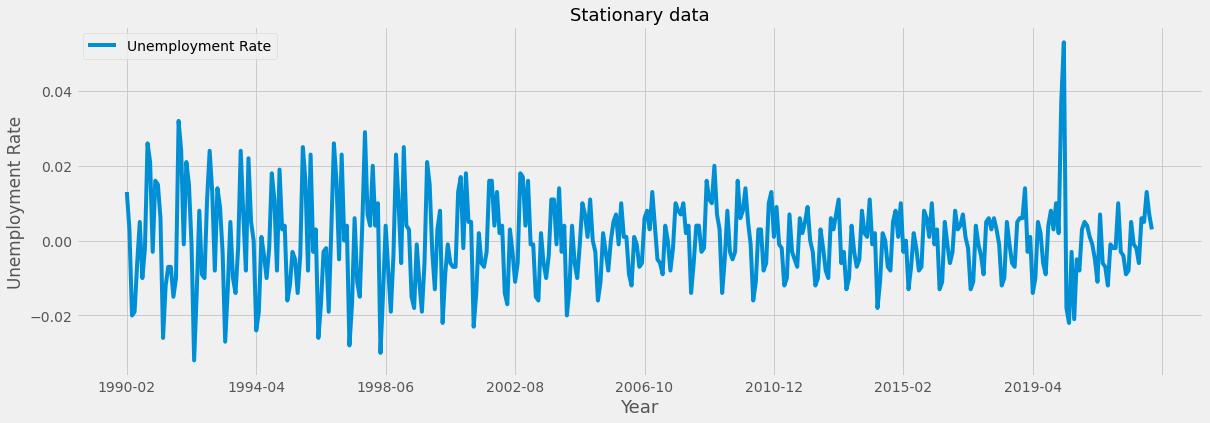

In [8]:
# call our diff() function on Fresno county data to make stationary
Fresno_stationary = diff(Fresno)
Fresno_stationary

In [9]:
Fresno.tail()

,Area Name,Labor Force,Employment,Unemployment,Unemployment Rate
month_year,,,,,
2022-10,Fresno County,454600,428400,26100,0.058
2022-09,Fresno County,456500,432700,23800,0.052
2023-02,Fresno County,466100,427600,38500,0.083
2023-01,Fresno County,458500,423800,34600,0.076
2023-03,Fresno County,467000,427000,40100,0.086


In [10]:
# Drop columns to prep data for time series analysis
Fresno_tsa = Fresno.drop(['Area Name', 
             'Labor Force',
             'Employment', 
             'Unemployment'], axis =1 )
Fresno_tsa.head()

,Unemployment Rate
month_year,
1990-04,0.122
1990-08,0.092
1990-12,0.134
1990-02,0.139
1990-01,0.126


In [11]:
# replicate stationary data
Fresno_arma = Fresno_tsa.diff(periods =1)

In [12]:
# create cutoff variable for train/test split
cutoff = round(Fresno_arma.shape[0] * 0.75)
cutoff

298

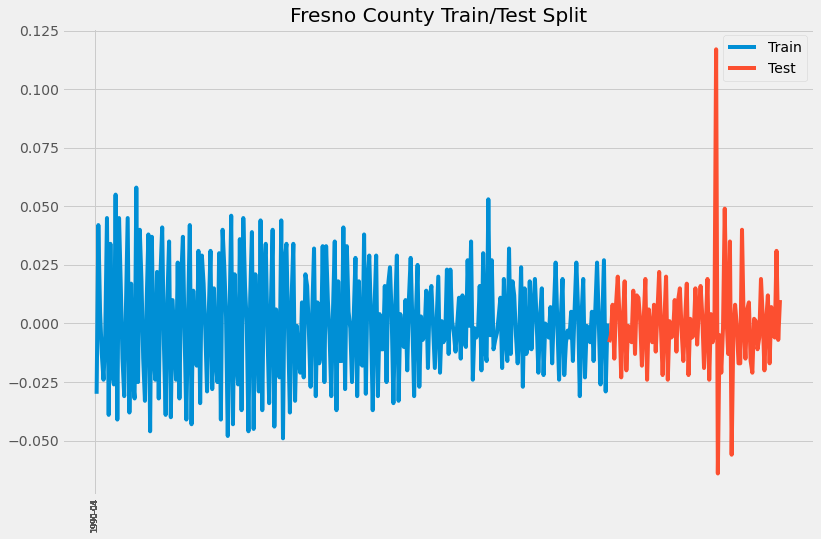

In [13]:
# plot our new split 
train = Fresno_arma[:cutoff]
test = Fresno_arma[cutoff: ]



fig, ax = plt.subplots(figsize = (12,8))
plt.locator_params(axis='x', nbins=12)
plt.xticks(fontsize=8, rotation=90)
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax), 2))



ax.plot(train, label = 'Train')
ax.plot(test, label = 'Test')
ax.set_title('Fresno County Train/Test Split')

plt.legend();

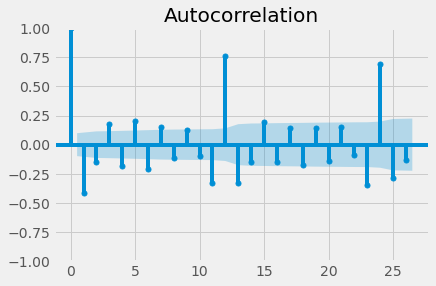

In [14]:
# import acf, pacf and plotting tools 
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Fresno_arma.dropna());

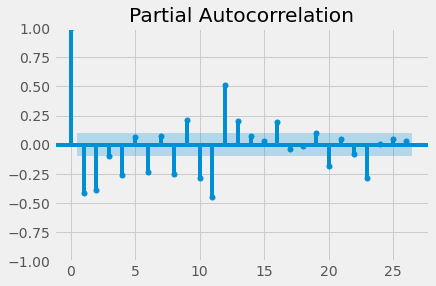

In [15]:
# plot pacf and get our ar term
plot_pacf(Fresno_arma.dropna());

In [16]:
# import ARIMA from statsmodels.tsa.arima.model

# Let's create our baseline model 
from statsmodels.tsa.arima.model import ARIMA
arma_Fresno = ARIMA(train, order = (0,0,0)).fit()

C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self

In [17]:
print(arma_Fresno.summary())

                               SARIMAX Results                                
Dep. Variable:      Unemployment Rate   No. Observations:                  298
Model:                          ARIMA   Log Likelihood                 687.520
Date:                Mon, 29 May 2023   AIC                          -1371.040
Time:                        19:19:50   BIC                          -1363.645
Sample:                             0   HQIC                         -1368.080
                                - 298                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.204e-05      0.001     -0.030      0.976      -0.003       0.003
sigma2         0.0006   5.99e-05      9.531      0.000       0.000       0.001
Ljung-Box (L1) (Q):                  55.81   Jarque-

In [18]:
train = train.dropna()

In [19]:
y_hat = arma_Fresno.predict(type='levels')
y_hat = y_hat[1:]

In [20]:
# RMSE on our baseline predictor

# import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(train, y_hat))

0.023901354512437942

We will need to figure out how to address acf and pacf. Perhaps a gridsearch function with all of the potential values that could improve our AIC score. 

## Gridsearch Function

Thank you to Ely and their article from https://medium.com/@ely-lin/grid-searching-time-series-models-1214dfa3de60 for the two functions below. These function as gridsearch functions and will tell us our best model performance.

In [21]:
def gridsearch(dataset, p_list, d_list, q_list):
    # set initial best AIC score at infinity to start lowering it
    best_aic=float('inf')
    for p in p_list:
        for d in d_list:
            for q in q_list:
                try:
                    # fit the model to this set of parameters
                    model = ARIMA(dataset, order=(p,d,q)).fit()
                    # assign the model's aic attribute to a variable
                    aic = model.aic
                    # compare it to the previous set                               
                    if aic < best_aic:
                        best_aic=aic
                        best_order = (p,d,q)
                        best_model = model
                except:
                    continue
    return best_aic, best_order, best_model

In [32]:
# runs gridsearch on train, will take about 7 minutes

# b_aic, b_order, b_model = gridsearch(train,
#                                      [0,6,12,18],
#                                      [1,2,3,4,5,6],
#                                      [0,6,12,18])
# print(f'The best AIC score is {b_aic}')
# print(f'The best order set is {b_order}')

# Expected Output: The best AIC score is -1960.1035756349838
# Expected Output: The best order set is (18, 1, 0)

In [33]:
arma_Fresno = ARIMA(train, order = (18,1,0)).fit()

C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self

In [34]:
print(arma_Fresno.summary())

                               SARIMAX Results                                
Dep. Variable:      Unemployment Rate   No. Observations:                  297
Model:                ARIMA(18, 1, 0)   Log Likelihood                 999.052
Date:                Mon, 29 May 2023   AIC                          -1960.104
Time:                        19:38:00   BIC                          -1889.987
Sample:                             0   HQIC                         -1932.030
                                - 297                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3554      0.056    -24.393      0.000      -1.464      -1.246
ar.L2         -1.6593      0.081    -20.475      0.000      -1.818      -1.500
ar.L3         -1.7719      0.114    -15.481      0.0

In [35]:
# Because there is a drift of 1 we will have to drop nulls
train = train.dropna()

In [36]:
# RMSE for our new model 
y_hat = arma_Fresno.predict(typ='levels')
np.sqrt(mean_squared_error(train,y_hat))

0.009920609845306691

In [63]:
# fit same ARIMA parameters to  test set 
arma_Fresno_test = ARIMA(test, order = (18,1,0)).fit()

C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self

In [64]:
# Get aic score for test score
print(arma_Fresno_test.aic)

-489.2176367350381


In [65]:
# RMSE score for test data
y_hat = arma_Fresno_test.predict(typ='levels')
np.sqrt(mean_squared_error(test, y_hat))

0.01654107129362125

### Predict Fresno County's incoming unemployment rates

In [54]:
forecast = arma_Fresno.forecast(112)
forecast

C:\Users\jkrug\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


297    0.000846
298   -0.009078
299    0.005158
300   -0.016843
301    0.006418
         ...   
404   -0.000928
405    0.005569
406   -0.007494
407    0.001782
408   -0.008626
Name: predicted_mean, Length: 112, dtype: float64

In [55]:
forecast.index.tolist()

[297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408]

In [56]:
test.index.tolist()

['2014-10',
 '2014-09',
 '2015-04',
 '2015-08',
 '2015-12',
 '2015-02',
 '2015-01',
 '2015-07',
 '2015-06',
 '2015-03',
 '2015-05',
 '2015-11',
 '2015-10',
 '2015-09',
 '2016-04',
 '2016-08',
 '2016-12',
 '2016-02',
 '2016-01',
 '2016-07',
 '2016-06',
 '2016-03',
 '2016-05',
 '2016-11',
 '2016-10',
 '2016-09',
 '2017-04',
 '2017-08',
 '2017-12',
 '2017-02',
 '2017-01',
 '2017-07',
 '2017-06',
 '2017-03',
 '2017-05',
 '2017-11',
 '2017-10',
 '2017-09',
 '2018-04',
 '2018-08',
 '2018-12',
 '2018-02',
 '2018-01',
 '2018-07',
 '2018-06',
 '2018-03',
 '2018-05',
 '2018-11',
 '2018-10',
 '2018-09',
 '2019-04',
 '2019-08',
 '2019-12',
 '2019-02',
 '2019-01',
 '2019-07',
 '2019-06',
 '2019-03',
 '2019-05',
 '2019-11',
 '2019-10',
 '2019-09',
 '2020-04',
 '2020-08',
 '2020-12',
 '2020-02',
 '2020-01',
 '2020-07',
 '2020-06',
 '2020-03',
 '2020-05',
 '2020-11',
 '2020-10',
 '2020-09',
 '2021-04',
 '2021-08',
 '2021-12',
 '2021-02',
 '2021-01',
 '2021-07',
 '2021-06',
 '2021-03',
 '2021-05',
 '20

In [57]:
forecast = pd.DataFrame(forecast)

In [58]:
forecast.tail()

,predicted_mean
404,-0.000928
405,0.005569
406,-0.007494
407,0.001782
408,-0.008626


In [60]:
list = ['2014-10',
 '2014-09',
 '2015-04',
 '2015-08',
 '2015-12',
 '2015-02',
 '2015-01',
 '2015-07',
 '2015-06',
 '2015-03',
 '2015-05',
 '2015-11',
 '2015-10',
 '2015-09',
 '2016-04',
 '2016-08',
 '2016-12',
 '2016-02',
 '2016-01',
 '2016-07',
 '2016-06',
 '2016-03',
 '2016-05',
 '2016-11',
 '2016-10',
 '2016-09',
 '2017-04',
 '2017-08',
 '2017-12',
 '2017-02',
 '2017-01',
 '2017-07',
 '2017-06',
 '2017-03',
 '2017-05',
 '2017-11',
 '2017-10',
 '2017-09',
 '2018-04',
 '2018-08',
 '2018-12',
 '2018-02',
 '2018-01',
 '2018-07',
 '2018-06',
 '2018-03',
 '2018-05',
 '2018-11',
 '2018-10',
 '2018-09',
 '2019-04',
 '2019-08',
 '2019-12',
 '2019-02',
 '2019-01',
 '2019-07',
 '2019-06',
 '2019-03',
 '2019-05',
 '2019-11',
 '2019-10',
 '2019-09',
 '2020-04',
 '2020-08',
 '2020-12',
 '2020-02',
 '2020-01',
 '2020-07',
 '2020-06',
 '2020-03',
 '2020-05',
 '2020-11',
 '2020-10',
 '2020-09',
 '2021-04',
 '2021-08',
 '2021-12',
 '2021-02',
 '2021-01',
 '2021-07',
 '2021-06',
 '2021-03',
 '2021-05',
 '2021-11',
 '2021-10',
 '2021-09',
 '2022-04',
 '2022-08',
 '2022-02',
 '2022-01',
 '2022-07',
 '2022-06',
 '2022-03',
 '2022-05',
 '2022-11',
 '2022-10',
 '2022-09',
 '2023-02',
 '2023-01',
 '2023-03',
       '2023-04',
       '2023-05',
       '2023-06',
       '2023-07',
       '2023-08',
       '2023-09',
       '2023-10',
       '2023-11',
       '2023-12',
       '2024-01',
       '2024-02',
       '2024-03'
       ]

forecast['Year'] = list

forecast

,predicted_mean,Year
297,0.000846,2014-10
298,-0.009078,2014-09
299,0.005158,2015-04
300,-0.016843,2015-08
301,0.006418,2015-12
...,...,...
404,-0.000928,2023-11
405,0.005569,2023-12
406,-0.007494,2024-01
407,0.001782,2024-02


In [61]:
forecast = forecast.set_index('Year')

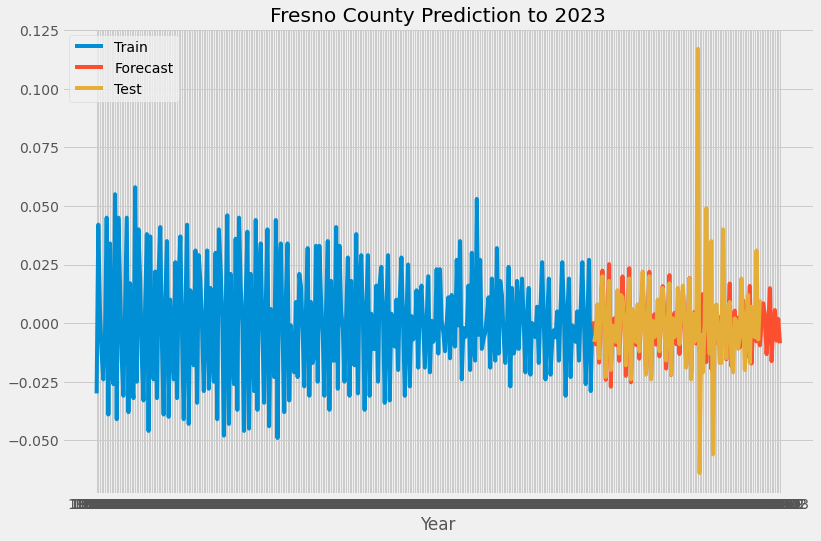

In [66]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(train, label = 'Train')
ax.plot(forecast, label = 'Forecast')
ax.plot(test, label = 'Test')
ax.set_title('Fresno County Prediction to 2023')
ax.set_xlabel('Year')
ax.legend();